In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv("Dataset/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

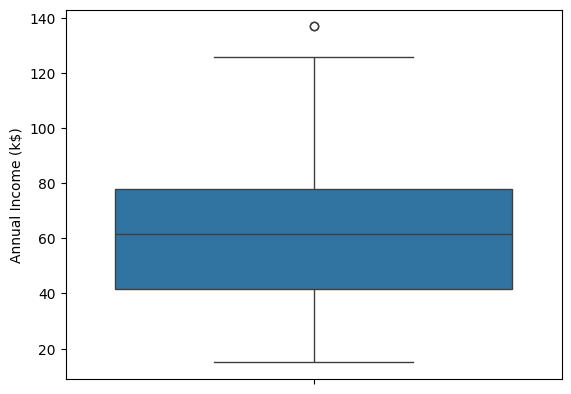

In [4]:
sns.boxplot(y='Annual Income (k$)', data=df)
plt.show()

In [9]:
# Outliers treatment
Q1 = df["Annual Income (k$)"].quantile(0.25)
Q3 = df["Annual Income (k$)"].quantile(0.80)
IQR = Q3 - Q1
low_fence = Q1-1.5*IQR
high_fence = Q3+1.5*IQR
df = df[df["Annual Income (k$)"]<high_fence]


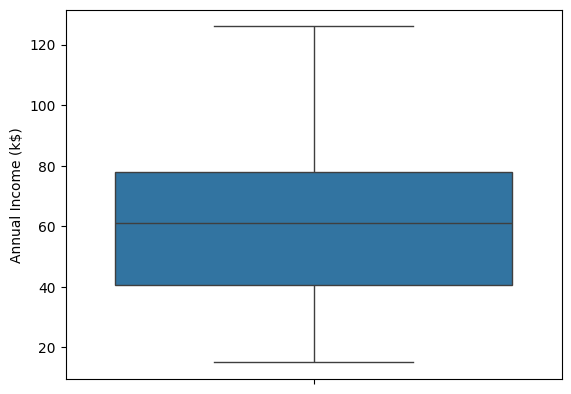

In [13]:
sns.boxplot(y = "Annual Income (k$)", data=df)
plt.show()

In [15]:
#Clustering for either x or y is enough
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
#or
y=df[["Annual Income (k$)","Age"]]

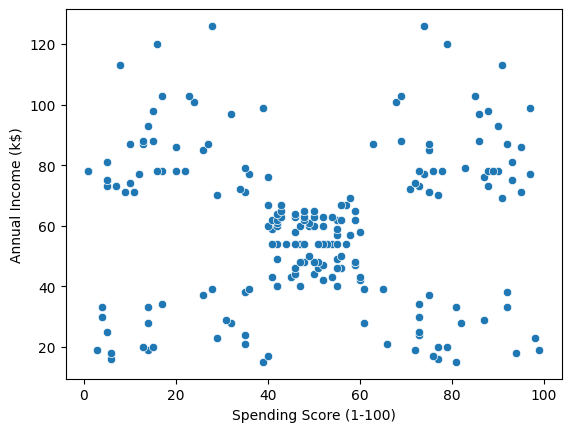

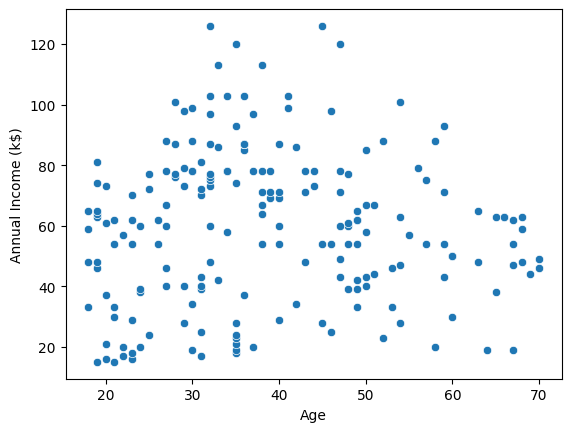

In [17]:
sns.scatterplot(x='Spending Score (1-100)', y="Annual Income (k$)", data = x)
plt.show()
sns.scatterplot(x="Age",y="Annual Income (k$)",data=y)
plt.show()

In [18]:
SumSquarex=[]
for i in range(1,10):
    modelx=KMeans(n_clusters=i)
    modelx.fit(x)
    SumSquarex.append(modelx.inertia_)

SumSquarey=[]
for i in range(1,10):
    modely=KMeans(n_clusters=i)
    modely.fit(y)
    SumSquarey.append(modely.inertia_)

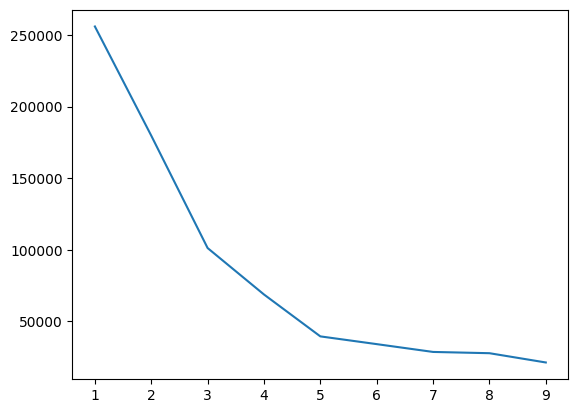

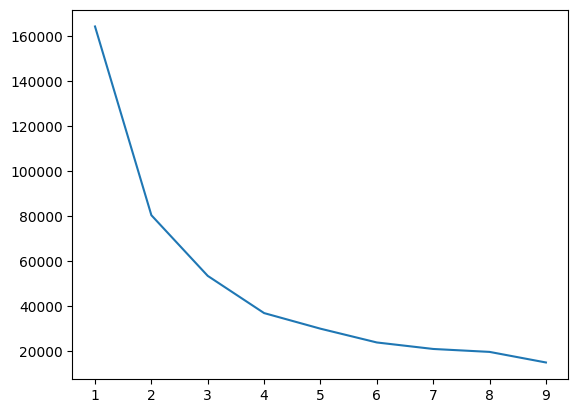

In [19]:
plt.plot(range(1,10),SumSquarex)
plt.show()
plt.plot(range(1,10),SumSquarey)
plt.show()

In [20]:
modelx=KMeans(n_clusters=5)
modelx.fit(x)
modely=KMeans(n_clusters=4)
modely.fit(y)

KMeans(n_clusters=4)

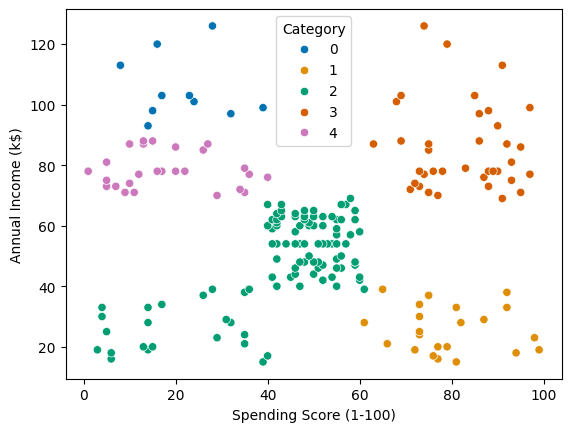

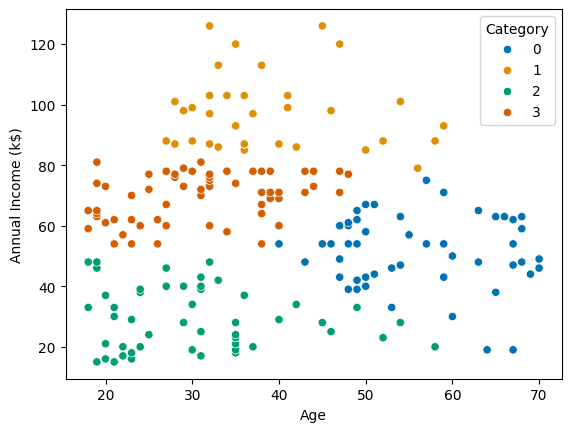

In [22]:
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",hue="Category",data=x,palette="colorblind")
plt.show()
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Category",data=y,palette="colorblind")
plt.show()